In [1]:
import numpy as np
import pandas as pd
import plotly

# Are presidential elections becoming more divisive over time?
Watching the election results trickle in, I noticed that some states, such Alaska or my native California, had a _huge_ margin of victory for the winner, while others, like Michican, had an extremely slim margin. Is this ususally the case? I was interested in the trend of "closeness" or "margins" over time.

Source: [MIT Election Data and Science Lab, 2017, "U.S. Senate 1976–2018"](https://doi.org/10.7910/DVN/PEJ5QU)

In [2]:
raw_data = pd.read_csv('./dataverse_files/1976-2016-president.csv')

In [3]:
raw_data

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party,writein,candidatevotes,totalvotes,version,notes
0,1976,Alabama,AL,1,63,41,US President,"Carter, Jimmy",democrat,False,659170,1182850,20171015,NaN
1,1976,Alabama,AL,1,63,41,US President,"Ford, Gerald",republican,False,504070,1182850,20171015,NaN
2,1976,Alabama,AL,1,63,41,US President,"Maddox, Lester",american independent party,False,9198,1182850,20171015,NaN
3,1976,Alabama,AL,1,63,41,US President,"Bubar, Benjamin """"Ben""""",prohibition,False,6669,1182850,20171015,NaN
4,1976,Alabama,AL,1,63,41,US President,"Hall, Gus",communist party use,False,1954,1182850,20171015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3735,2016,Wyoming,WY,56,83,68,US President,NaN,NaN,True,6904,258788,20171015,NaN
3736,2016,Wyoming,WY,56,83,68,US President,NaN,independent,False,3224,258788,20171015,NaN
3737,2016,Wyoming,WY,56,83,68,US President,Blank Vote,NaN,False,2661,258788,20171015,NaN
3738,2016,Wyoming,WY,56,83,68,US President,"Castle, Darrell L.",constitution party,False,2042,258788,20171015,NaN


I want to figure out the average difference between % of a state won by a candidate over time, so I'm going to add that attribute to our data.

In [4]:
raw_data['percent'] = raw_data.apply(lambda df: 100 * df['candidatevotes'] / df['totalvotes'], axis=1)

In [5]:
raw_data

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party,writein,candidatevotes,totalvotes,version,notes,percent
0,1976,Alabama,AL,1,63,41,US President,"Carter, Jimmy",democrat,False,659170,1182850,20171015,NaN,55.727269
1,1976,Alabama,AL,1,63,41,US President,"Ford, Gerald",republican,False,504070,1182850,20171015,NaN,42.614871
2,1976,Alabama,AL,1,63,41,US President,"Maddox, Lester",american independent party,False,9198,1182850,20171015,NaN,0.777613
3,1976,Alabama,AL,1,63,41,US President,"Bubar, Benjamin """"Ben""""",prohibition,False,6669,1182850,20171015,NaN,0.563808
4,1976,Alabama,AL,1,63,41,US President,"Hall, Gus",communist party use,False,1954,1182850,20171015,NaN,0.165194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3735,2016,Wyoming,WY,56,83,68,US President,NaN,NaN,True,6904,258788,20171015,NaN,2.667821
3736,2016,Wyoming,WY,56,83,68,US President,NaN,independent,False,3224,258788,20171015,NaN,1.245807
3737,2016,Wyoming,WY,56,83,68,US President,Blank Vote,NaN,False,2661,258788,20171015,NaN,1.028255
3738,2016,Wyoming,WY,56,83,68,US President,"Castle, Darrell L.",constitution party,False,2042,258788,20171015,NaN,0.789063


After playing around with the dataset, I noticed that there were anomalies surrounding write-in candidates. In 2016, for example, some voters wrote Hillary Clinton in as a candidate, even though she was on the ballot. Since write-in votes make up an extremely small portion of this dataset, I'm going to drop them, for the sake of making the analysis easier.

In [6]:
clean_data = raw_data[~raw_data['writein']]

While I wish it weren't the case, the reality is that all presidental elections are two-party two-candidate races. Thus, I'm going to only consider the margin of votes between republican and democratic candidates, ignoring third party candidates.

In [7]:
democrats = clean_data[clean_data['party'] == 'democrat'].set_index(['year', 'state'])
republicans = clean_data[clean_data['party'] == 'republican'].set_index(['year', 'state'])

Here's what these tables look like:

In [8]:
display(democrats)
display(republicans)

state_po  state_fips  state_cen  state_ic        office  \
year state                                                                   
1976 Alabama             AL           1         63        41  US President   
     Alaska              AK           2         94        81  US President   
     Arizona             AZ           4         86        61  US President   
     Arkansas            AR           5         71        42  US President   
     California          CA           6         93        71  US President   
...                     ...         ...        ...       ...           ...   
2016 Virginia            VA          51         54        40  US President   
     Washington          WA          53         91        73  US President   
     West Virginia       WV          54         55        56  US President   
     Wisconsin           WI          55         35        25  US President   
     Wyoming             WY          56         83        68  US President   

                           candidate     party  writein  candidatevotes  \
year state                                                                
1976 Alabama           Carter, Jimmy  democrat    False          659170   
     Alaska            Carter, Jimmy  democrat    False           44058   
     Arizona           Carter, Jimmy  democrat    False          295602   
     Arkansas          Carter, Jimmy  democrat    False          498604   
     California        Carter, Jimmy  democrat    False         3742284   
...                              ...       ...      ...             ...   
2016 Virginia       Clinton, Hillary  democrat    False         1981473   
     Washington     Clinton, Hillary  democrat    False         1742718   
     West Virginia  Clinton, Hillary  democrat    False          188794   
     Wisconsin      Clinton, Hillary  democrat    False         1382536   
     Wyoming        Clinton, Hillary  democrat    False           55973   

                    totalvotes   version  notes    percent  
year state                                                  
1976 Alabama           1182850  20171015    NaN  55.727269  
     Alaska             123574  20171015    NaN  35.653131  
     Arizona            742719  20171015    NaN  39.799978  
     Arkansas           767535  20171015    NaN  64.961728  
     California        7803770  20171015    NaN  47.954822  
...                        ...       ...    ...        ...  
2016 Virginia          3982752  20171015    NaN  49.751353  
     Washington        3317019  20171015    NaN  52.538680  
     West Virginia      713051  20171015    NaN  26.476928  
     Wisconsin         2976150  20171015    NaN  46.453841  
     Wyoming            258788  20171015    NaN  21.628901  

[558 rows x 13 columns]

state_po  state_fips  state_cen  state_ic        office  \
year state                                                                   
1976 Alabama             AL           1         63        41  US President   
     Alaska              AK           2         94        81  US President   
     Arizona             AZ           4         86        61  US President   
     Arkansas            AR           5         71        42  US President   
     California          CA           6         93        71  US President   
...                     ...         ...        ...       ...           ...   
2016 Virginia            VA          51         54        40  US President   
     Washington          WA          53         91        73  US President   
     West Virginia       WV          54         55        56  US President   
     Wisconsin           WI          55         35        25  US President   
     Wyoming             WY          56         83        68  US President   

                           candidate       party  writein  candidatevotes  \
year state                                                                  
1976 Alabama            Ford, Gerald  republican    False          504070   
     Alaska             Ford, Gerald  republican    False           71555   
     Arizona            Ford, Gerald  republican    False          418642   
     Arkansas           Ford, Gerald  republican    False          267903   
     California         Ford, Gerald  republican    False         3882244   
...                              ...         ...      ...             ...   
2016 Virginia       Trump, Donald J.  republican    False         1769443   
     Washington     Trump, Donald J.  republican    False         1221747   
     West Virginia  Trump, Donald J.  republican    False          489371   
     Wisconsin      Trump, Donald J.  republican    False         1405284   
     Wyoming        Trump, Donald J.  republican    False          174419   

                    totalvotes   version  notes    percent  
year state                                                  
1976 Alabama           1182850  20171015    NaN  42.614871  
     Alaska             123574  20171015    NaN  57.904575  
     Arizona            742719  20171015    NaN  56.366136  
     Arkansas           767535  20171015    NaN  34.904337  
     California        7803770  20171015    NaN  49.748314  
...                        ...       ...    ...        ...  
2016 Virginia          3982752  20171015    NaN  44.427647  
     Washington        3317019  20171015    NaN  36.832680  
     West Virginia      713051  20171015    NaN  68.630575  
     Wisconsin         2976150  20171015    NaN  47.218185  
     Wyoming            258788  20171015    NaN  67.398411  

[561 rows x 13 columns]

Note that we have a heirarchial index, or a `MultiIndex` as pandas calls it.

Now let's investigate the vote margins per-state per-year.

In [9]:
margins = abs(democrats['percent'] - republicans['percent']).rename('margin')

In [10]:
margins

year  state        
1976  Alabama          13.112398
      Alaska           22.251444
      Arizona          16.566158
      Arkansas         30.057392
      California        1.793492
                         ...    
2016  Virginia          5.323706
      Washington       15.706000
      West Virginia    42.153647
      Wisconsin         0.764343
      Wyoming          45.769510
Name: margin, Length: 561, dtype: float64

This pandas `Series` tells us the percent margin between presidential candidates per-state per-year.

Now let's get some summary statistics, such as the average margin per year:

In [11]:
avg_margins = margins.groupby('year').mean().rename('mean_margin')

In [12]:
avg_margins

year
1976    10.084923
1980    15.379624
1984    23.140974
1988    13.875442
1992     9.641823
1996    13.125619
2000    15.466833
2004    16.279743
2008    17.656018
2012    18.770155
2016    18.380372
Name: mean_margin, dtype: float64

<AxesSubplot:xlabel='year'>

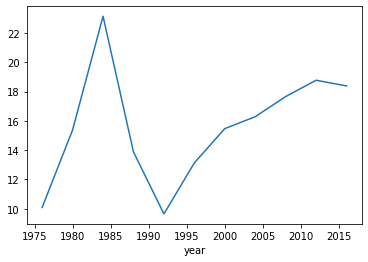

In [13]:
avg_margins.plot()

In [14]:
median_margins = margins.groupby('year').median().rename('median_margins')

<AxesSubplot:xlabel='year'>

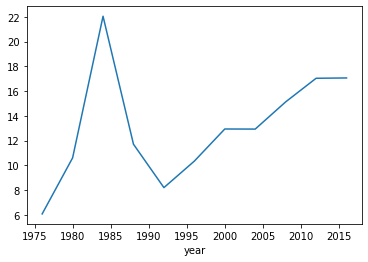

In [15]:
median_margins.plot()

In [28]:
avg_margins.idxmin()

1992

What happened in 1992?

[Ross Perot won the most votes that a third-party candidate has ever won](https://www.270towin.com/1992_Election/)

Interesting. I guess this means I'll have to re-think my assumption about most races coming down to two candidates. The low average margin between Red and Blue for this year could be because a decent portion of votes were going to Ross Perot, pulling the Red and Blue votes closer together.

In [27]:
avg_margins.idxmax()

1984

What happened in 1984?

[Regan won 48 out of 50 states](https://www.270towin.com/1984_Election/)

It makes sense that this year would have the highest average margin between Republican and Democratic candidates. Most folks were voting Republican!

What about those states that seem to have large margins, like Alaska or California? Have they always been that way?

In [16]:
ak_margins = margins.loc[slice(None), 'Alaska']
ak_margins

year
1976    22.251444
1980    27.940295
1984    36.786205
1988    23.319974
1992     9.170387
1996    17.534145
2000    30.954615
2004    25.548468
2008    21.535146
2012    13.988918
2016    14.730641
Name: margin, dtype: float64

<AxesSubplot:xlabel='year'>

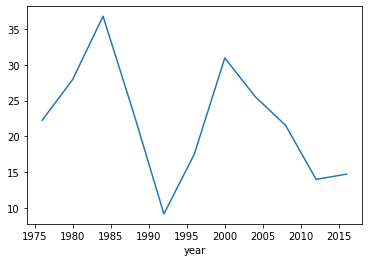

In [17]:
ak_margins.plot()

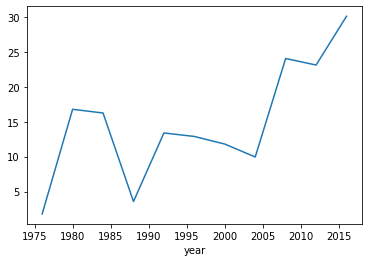

In [30]:
ca_margins = margins.loc[slice(None), 'California'].plot()

Interesting. Seems like maybe California has always had pretty large margins ($> 10 \%$ is pretty big in the election world) except for in 1988.

Concluding thoughts:
* Does margin reflect consensus in the electorate of a state? I.e, does a large margin in a state mean that there is a lot of consensus among that state's voters?
* Does low margin reflect division within an electorte?

<AxesSubplot:xlabel='year'>

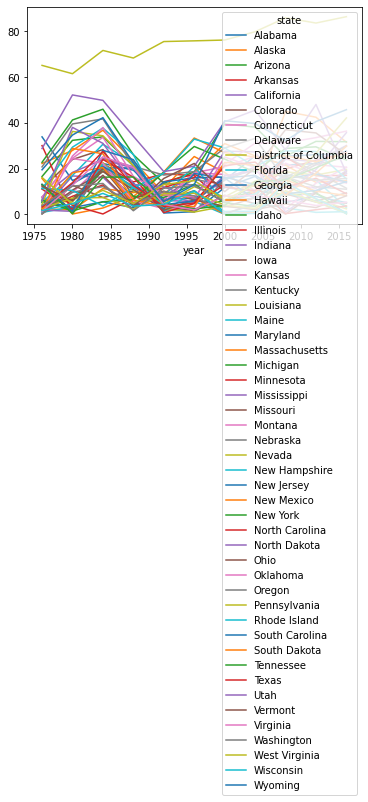

In [19]:
margins.unstack(level=-1).plot()